In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv('data/ted_main.csv', parse_dates=['film_date', 'published_date'], 
                 converters={'ratings': literal_eval, 'tags': literal_eval, 'related_talks': literal_eval})

In [3]:
df['film_date'] = pd.to_datetime(df['film_date'], unit='s')
df['published_date'] = pd.to_datetime(df['published_date'], unit='s')

In [4]:
df.head(5)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"[children, creativity, culture, dance, educati...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"[alternative energy, cars, climate change, cul...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,2006-02-24,26,David Pogue,David Pogue: Simplicity sells,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"[computers, entertainment, interface design, m...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,2006-02-26,35,Majora Carter,Majora Carter: Greening the ghetto,1,2006-06-27 00:11:00,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"[MacArthur grant, activism, business, cities, ...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,2006-02-22,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,2006-06-27 20:38:00,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"[Africa, Asia, Google, demo, economics, global...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [5]:
df.views.describe()

count       2550.000
mean     1698297.482
std      2498479.372
min        50443.000
25%       755792.750
50%      1124523.500
75%      1700759.500
max     47227110.000
Name: views, dtype: float64

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


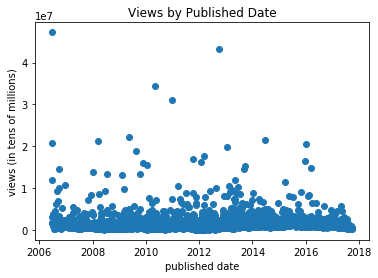

In [6]:
plt.scatter(df.published_date, df.views)
plt.title('Views by Published Date')
plt.xlabel('published date')
plt.ylabel('views (in tens of millions)')
plt.show()

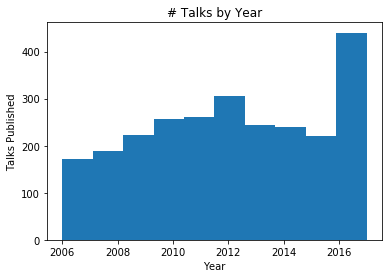

In [7]:
plt.hist(df.published_date.dt.year)
plt.title('# Talks by Year')
plt.xlabel('Year')
plt.ylabel('Talks Published')
plt.show()

Text(0.5, 1.0, 'Views and Comments Scatterplot')

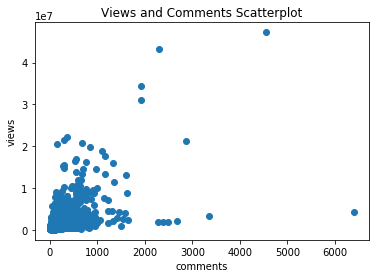

In [8]:
plt.scatter(df.comments, df.views)
plt.xlabel('comments')
plt.ylabel('views')
plt.title('Views and Comments Scatterplot')

Text(0.5, 1.0, 'Views and Languages Scatterplot')

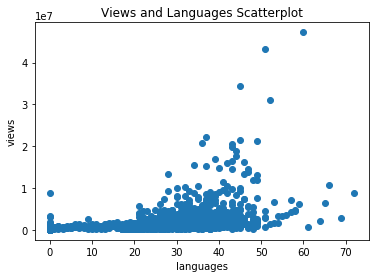

In [9]:
plt.scatter(df.languages, df.views)
plt.xlabel('languages')
plt.ylabel('views')
plt.title('Views and Languages Scatterplot')

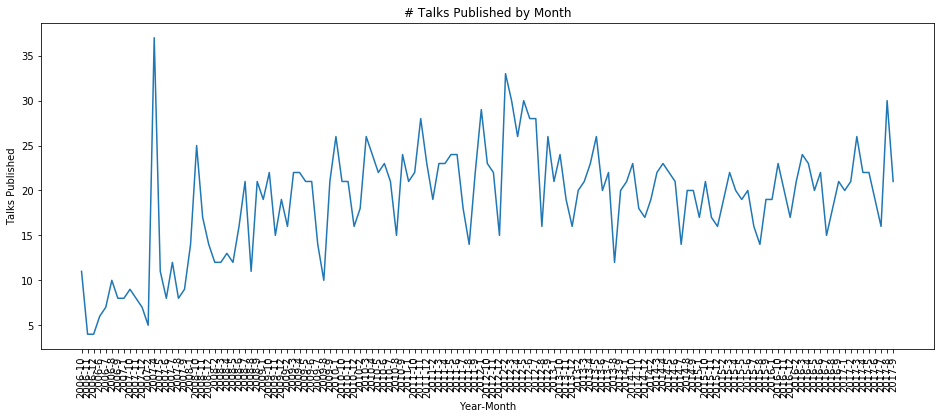

In [10]:
df['published_year_month'] = df.published_date.dt.year.map(str) + '-' + df.published_date.dt.month.map(str)
gb = df.groupby(df.published_year_month)

plt.figure(figsize=(16, 6))
plt.xticks(rotation='vertical')
plt.plot(gb['name'].count())
plt.title('# Talks Published by Month')
plt.xlabel('Year-Month')
plt.ylabel('Talks Published')
plt.show()

In [11]:
df['top_rating'] = df.ratings.apply(lambda x: x[0]['name'])
df['top_rating_count'] = df.ratings.apply(lambda x: x[0]['count'])
df['second_rating'] = df.ratings.apply(lambda x: x[1]['name'])
df['second_rating_count'] = df.ratings.apply(lambda x: x[1]['count'])

Text(0.5, 1.0, 'Top-Rating Histogram')

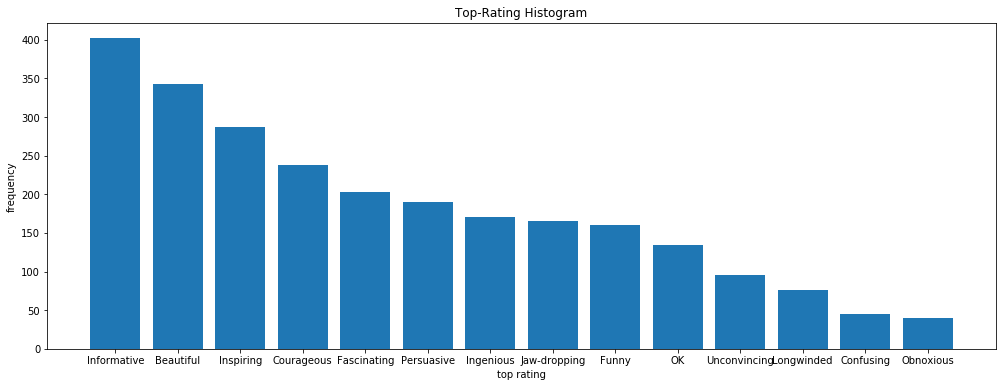

In [12]:
plt.figure(figsize=(17, 6))
plt.bar(df.top_rating.value_counts().index, df.top_rating.value_counts().values)
plt.xlabel('top rating')
plt.ylabel('frequency')
plt.title('Top-Rating Histogram')

In [13]:
# single-tiered ratings avgs
df.groupby('top_rating')[['views', 'comments']].mean().sort_values(by='views', ascending=False)

,views,comments
top_rating,,
Funny,2658212.844,223.244
Jaw-dropping,2048430.765,266.247
Persuasive,1929209.553,252.768
Fascinating,1761518.463,216.867
Unconvincing,1746118.583,256.927
Confusing,1743484.467,145.422
Beautiful,1685146.805,122.344
Inspiring,1668297.746,196.289
Obnoxious,1624985.525,263.000


In [14]:
# two-tiered ratings avgs
gb = df.groupby(['top_rating', 'second_rating'])
gb.agg({'views': np.mean, 'comments':np.mean, 'name': len}).sort_values(by='views', ascending=False)

,,views,comments,name
top_rating,second_rating,,,
Jaw-dropping,Confusing,9551344.000,902.000,1
Confusing,Jaw-dropping,7174763.500,416.500,2
Ingenious,Obnoxious,6263759.000,309.000,1
Jaw-dropping,Informative,6247160.444,476.222,9
Funny,Courageous,5400883.857,293.286,7
...,...,...,...,...
Longwinded,Fascinating,581419.000,71.000,1
Fascinating,Obnoxious,567000.000,90.000,1
Longwinded,Jaw-dropping,556163.000,104.000,1
